In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
med = train_df.median()
train_df = train_df.fillna(med)
# 該填的->訓練資料中位數, 而不是測試的中位數
test_df = test_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
test_df["Embarked"] = test_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# 看一下test_df的缺失值
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
dummy = pd.get_dummies(train_df["Embarked"])
train_df = pd.concat([train_df, dummy], axis=1)
dummy = pd.get_dummies(test_df["Embarked"])
test_df = pd.concat([test_df, dummy], axis=1)

In [7]:
dummy = pd.get_dummies(train_df["Sex"])
train_df = pd.concat([train_df, dummy], axis=1)
dummy = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df, dummy], axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [8]:
# 示範一次拿中間稱謂
n = "Braund, Mr. Owen Harris"
n.split(",")[1].split(".")[0].replace(" ", "")

'Mr'

In [9]:
def nameflow(n):
    return n.split(",")[1].split(".")[0].replace(" ", "")
s = train_df["Name"].apply(nameflow)
pd.crosstab(s, train_df["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [10]:
def nameflow(n):
    temp = n.split(",")[1].split(".")[0].replace(" ", "")
    if temp == "Mr":
        return "Mr"
    elif temp == "Mrs":
        return "Mrs"
    elif temp == "Miss":
        return "Miss"
    else:
        return "Throw"
train_df["Name"] = train_df["Name"].apply(nameflow)
dummy = pd.get_dummies(train_df["Name"])
train_df = pd.concat([train_df, dummy], axis=1)
test_df["Name"] = test_df["Name"].apply(nameflow)
dummy = pd.get_dummies(test_df["Name"])
test_df = pd.concat([test_df, dummy], axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
5,6,0,3,Mr,male,28.0,0,0,330877,8.4583,...,Q,0,1,0,0,1,0,1,0,0
6,7,0,1,Mr,male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,1,0,1,0,0
7,8,0,3,Throw,male,2.0,3,1,349909,21.0750,...,S,0,0,1,0,1,0,0,0,1
8,9,1,3,Mrs,female,27.0,0,2,347742,11.1333,...,S,0,0,1,1,0,0,0,1,0
9,10,1,2,Mrs,female,14.0,1,0,237736,30.0708,...,C,1,0,0,1,0,0,0,1,0


In [11]:
train_df = train_df.drop(["PassengerId", "Name", "Sex", "Embarked", "Ticket", "Cabin", "Throw"]
                         , axis=1)
# PassengerId, 留下來填答案
test_df = test_df.drop(["Name", "Sex", "Embarked", "Ticket", "Cabin", "Throw"]
                         , axis=1)
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
5,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,0,3,2.0,3,1,21.0750,0,0,1,0,1,0,0,0
8,1,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,1


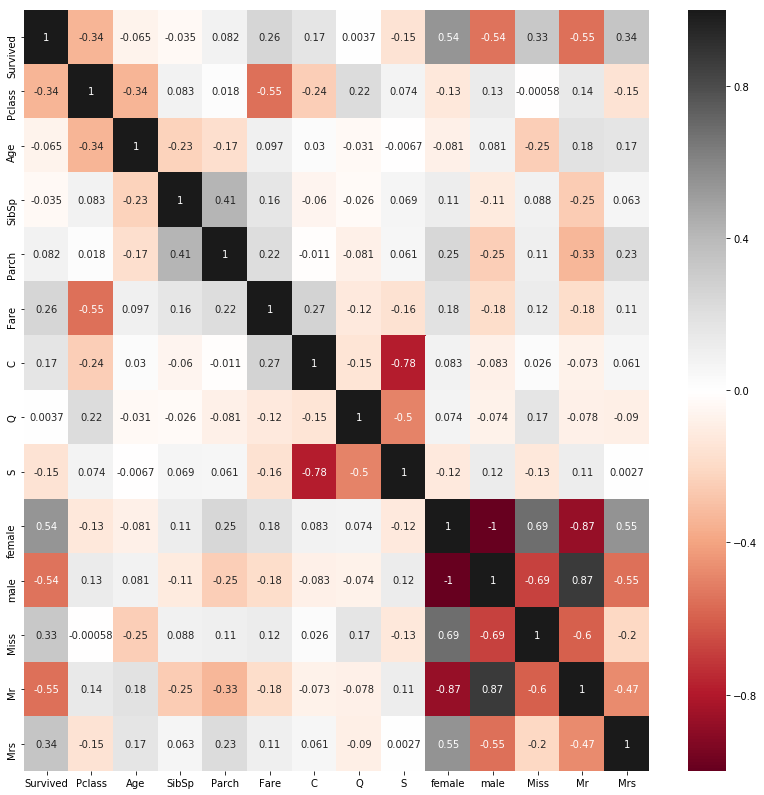

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(train_df.corr(), annot=True, cmap="RdGy")

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# n_estimators->妳有幾棵樹
clf = RandomForestClassifier(n_estimators=27, max_depth=7)
x = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
score = cross_val_score(clf, x, y, cv=10)
print("十次分數:", score)
print("平均分數:", np.average(score))

十次分數: [0.76666667 0.87777778 0.74157303 0.88764045 0.86516854 0.82022472
 0.83146067 0.79775281 0.87640449 0.85227273]
平均分數: 0.8316941890818296


In [14]:
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
testx = test_df.drop(["PassengerId"], axis=1)
testid = test_df["PassengerId"]
pre = clf.predict(testx)
result_df = pd.DataFrame()
result_df["PassengerId"] = testid
result_df["Survived"] = pre
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [16]:
result_df.to_csv("result.csv", encoding="utf-8", index=False)